In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM

from sklearn.preprocessing import MinMaxScaler

In [24]:
past_days = 120

## Importing data

In [21]:
dataset_train  = pd.read_csv('./data/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values  # Only the 'Open' column

In [44]:
sc = MinMaxScaler(feature_range= (0,1))
scaled_set = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(past_days, len(scaled_set)):
    X_train.append(scaled_set[i-past_days:i, 0]) # 0 is which column is used
    y_train.append(scaled_set[i])

X_train, y_train = np.array(X_train), np.array(y_train)

In [51]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

## Building model

In [59]:
model = Sequential([
    LSTM(units=50, input_shape= (X_train.shape[1], 1), return_sequences = True),
    Dropout(0.2),
    LSTM(units=50, return_sequences = True),
    Dropout(0.2),
    LSTM(units=50, return_sequences = True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer="adam", loss="mean_squared_error", metrics=['acc'])

model.summary()

/Users/bencetoth/Documents/Development/Projects/neural/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 120, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 120, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 120, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 120, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 120, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 120, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_fit_history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

## Testing model

In [86]:
dataset_test = pd.read_csv('./data/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - past_days:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [87]:
X_test = []
for i in range(past_days, past_days + 20):
    X_test.append(inputs[i-past_days:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


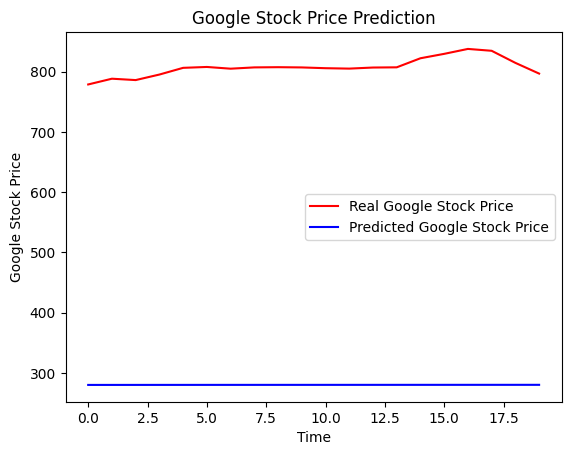

In [88]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()